# Tesla Stock Price Prediction with Machine Learning

Predicting Stock prices is a great use case of machine learning both for financial and time series analysis. Tesla has been in the eyes of the world for a long time now as governments of so many countries all over the world are supporting the vision of Tesla. So in this article, I will take you through a tutorial on how to use the Facebook Prophet model for the task of stock price prediction of Tesla.

##  Importing the necessary Python libraries and the dataset:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [3]:
df = pd.read_csv('TSLA.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-11,158.102005,164.800003,157.000000,162.257996,162.257996,82598000
1,2020-05-12,165.399994,168.658005,161.600006,161.882004,161.882004,79534500
2,2020-05-13,164.166000,165.199997,152.660004,158.192001,158.192001,95327500
3,2020-05-14,156.000000,160.671997,152.800003,160.666000,160.666000,68411000
4,2020-05-15,158.070007,161.009995,157.309998,159.834000,159.834000,52592000


## Data Visualization

In [5]:
tsla_df = df.copy()

In [7]:
# Change the datetime datatype
tsla_df.loc[:, 'Date'] = pd.to_datetime(df.loc[:,'Date'], format="%Y/%m/%d")

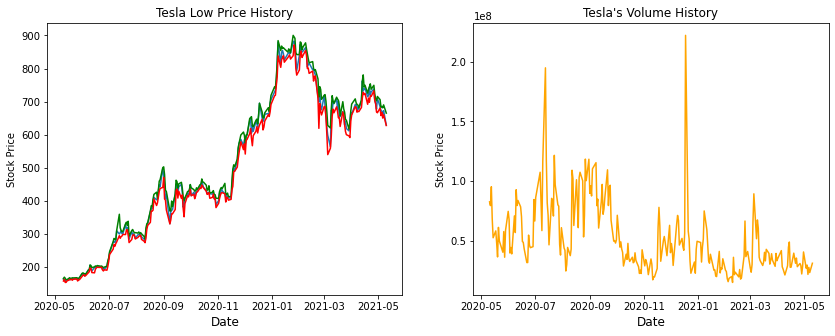

In [8]:
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(tsla_df["Date"], tsla_df["Close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Tesla Close Price History")

# Second Subplot
ax1.plot(tsla_df["Date"], tsla_df["High"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Tesla High Price History")

# Third Subplot
ax1.plot(tsla_df["Date"], tsla_df["Low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Tesla Low Price History")

# Fourth Subplot
ax2.plot(tsla_df["Date"], tsla_df["Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Tesla's Volume History")
plt.show()

**We only need two columns from this dataset (Date and Close), so let’s create a new DataFrame with only these two columns**

In [11]:
tsla_df = tsla_df[['Date','Close']]

**As we are using the Facebook prophet model here for predicting the stock prices of Tesla so we need to rename the columns**

In [14]:
tsla_df = tsla_df.rename(columns={"Date":'ds',"Close":'y'})

**So we have prepared the dataset for the Facebook prophet model, now let’s predict the stock prices of Tesla**

In [15]:
model = Prophet()
model.fit(tsla_df)
predict = model.make_future_dataframe(periods=365)
forecast = model.predict(predict)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-06,185.231047,-363.470884,716.468618
613,2022-05-07,191.624623,-379.342797,727.741351
614,2022-05-08,190.326840,-369.716924,726.692344
615,2022-05-09,179.235271,-381.548938,718.339594
616,2022-05-10,181.751962,-392.379250,732.333676


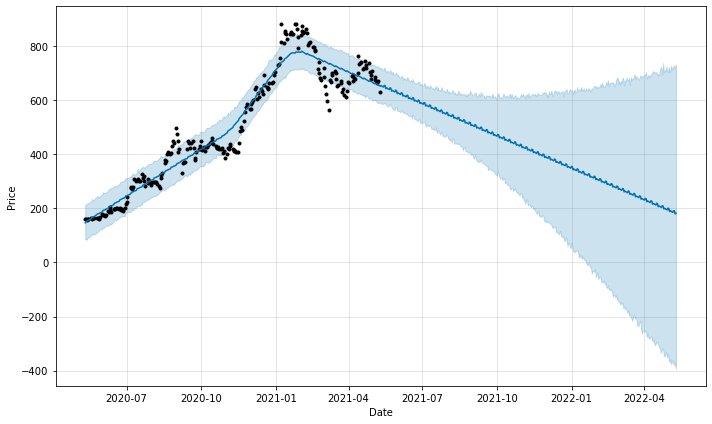

In [17]:
graph = model.plot(forecast, xlabel="Date", ylabel="Price")

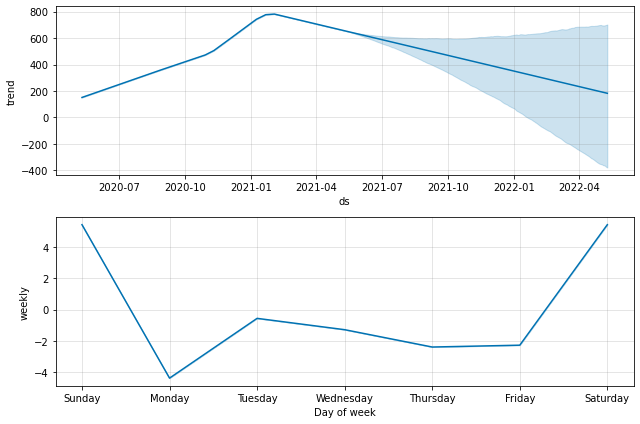

In [18]:
fig2 = model.plot_components(forecast)
plt.show()

### Conclusion

**It seems like Tesla’s stock prices will decrease in the coming future if they don’t come up with a new idea of representing their vision. This may be possible as other companies have also started manufacturing electric vehicles at a very low price as compared to Tesla.**